Importamos las librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Realizamos una primera visualización de los datos

In [2]:
df = pd.read_csv('laliga201920.csv')
df.head()

,team,team_id,player_id,player_name,position,known_name,first_name,last_name,shirtNumber,played_time,...,duels_aerial_won,duels_aerial_lost,tackles_total,tackles_won,tackles_lost,tackles_last_man,clearances,interceptions,recoveries,blocks
0,Getafe,1450,171222,Mauro Arambarri,Midfielder,NaN,Mauro,Arambarri,18,3071,...,73.0,73.0,72.0,33.0,39.0,NaN,33.0,43.0,201.0,5.0
1,Getafe,1450,20150,Markel Bergara,Midfielder,NaN,Markel,Bergara,5,70,...,1.0,2.0,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN
2,Getafe,1450,169586,Erick Cabaco,Defender,NaN,Erick,Cabaco,4,1075,...,31.0,24.0,15.0,11.0,4.0,NaN,60.0,15.0,61.0,8.0
3,Getafe,1450,64662,Leandro Cabrera,Defender,NaN,Leandro,Cabrera,6,3060,...,103.0,72.0,38.0,17.0,21.0,1.0,142.0,41.0,153.0,16.0
4,Getafe,1450,179268,Marc Cucurella,Defender,NaN,Marc,Cucurella,15,3248,...,55.0,82.0,75.0,52.0,23.0,NaN,22.0,36.0,242.0,8.0


In [3]:
df.shape

(568, 83)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 83 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   team                                              568 non-null    object 
 1   team_id                                           568 non-null    int64  
 2   player_id                                         568 non-null    int64  
 3   player_name                                       568 non-null    object 
 4   position                                          568 non-null    object 
 5   known_name                                        147 non-null    object 
 6   first_name                                        568 non-null    object 
 7   last_name                                         568 non-null    object 
 8   shirtNumber                                       568 non-null    int64  
 9   played_time          

Creamos nuevas variables para que nos ayuden con el análisis

In [5]:
# Shots
df['shots']= df.shots_total + df.shots_blocked

# 1v1
df['dribbles']= df.dribbles_successful + df.dribbles_unsuccessful

# Passes 
df['short_pass'] = df.passes_short_successful + df.passes_short_unsuccessful
df['long_pass'] = df.passes_long_successful + df.passes_long_unsuccessful
df['pass_opp_half'] = df.passes_opposition_half_successful + df.passes_opposition_half_unsuccessful
df['pass_own_half'] = df.passes_own_half_unsuccessful + df.passes_own_half_successful
df['crosses']= df.crosses_and_corners_unsuccessful + df.crosses_and_corners_successful
df['crosses_open_play'] = df.crosses_open_play_successful + df.crosses_open_play_unsuccessful
df['crosses_corners'] = df.corners_into_box_successful + df.corners_into_box_unsuccessful
df['corner_passes'] = df.corners_taken_include_short_corners - df.crosses_corners
df['passes_in_crosses'] = df.passes_total + df.crosses


Diferentes maneras de evaluar una variables categórica


In [6]:
df['position'].nunique()

4

In [7]:
df['position'].unique()

array(['Midfielder', 'Defender', 'Forward', 'Goalkeeper'], dtype=object)

In [8]:
df['position'].value_counts()

Midfielder    200
Defender      187
Forward       137
Goalkeeper     44
Name: position, dtype: int64

Cambiamos el nombre de las variables

In [9]:
df.rename(columns={'goals_from_inside_box': 'goals_inbox'}, inplace =True)
df.rename(columns={'goals_from_outside_box': 'goals_outbox'}, inplace =True)
df.rename(columns={'shots_attempts_from_set_pieces': 'shots_set_pieces'}, inplace =True)
df.rename(columns={'passes_total': 'passes'}, inplace =True)
df.rename(columns={'passes_open_play': 'pass_open_play'}, inplace =True)
df.rename(columns={'passes_backward': 'pass_backward'}, inplace =True)
df.rename(columns={'passes_forward': 'pass_forward'}, inplace =True)
df.rename(columns={'duels_total': 'duels'}, inplace =True)
df.rename(columns={'duels_ground_total': 'duels_ground'}, inplace =True)
df.rename(columns={'duels_aerial_total': 'duels_aerial'}, inplace =True)
df.rename(columns={'corners_taken_include_short_corners': 'corners'}, inplace =True)
df.rename(columns={'tackles_total': 'tackles'}, inplace =True)

Seleccionamos las columnas que utilizaremos para la agrupación

In [10]:
cols =['position',
#shots and goals
'shots','shots_set_pieces','goals', 'goals_inbox' ,'goals_outbox','goals_headed',
# Pass and assists
'passes', 'short_pass','long_pass', 'pass_open_play','pass_own_half','pass_opp_half',
'pass_backward','pass_forward','through_balls', 'assists', 'assists_second_goal',
'keypasses','crosses', 'crosses_open_play','corners','crosses_corners','corner_passes', 
# 1 vs 1
'duels','duels_ground', 'duels_aerial','dribbles',
# Defensive actions
'tackles','interceptions', 'recoveries', 'blocks']

group_df = df[cols]

Ejemplo de cómo filtramos el dataset por el valor de una columna

In [11]:
group_df[group_df.position=='Goalkeeper'].head()

,position,shots,shots_set_pieces,goals,goals_inbox,goals_outbox,goals_headed,passes,short_pass,long_pass,...,crosses_corners,corner_passes,duels,duels_ground,duels_aerial,dribbles,tackles,interceptions,recoveries,blocks
27,Goalkeeper,NaN,NaN,NaN,NaN,NaN,NaN,1093.0,87.0,1006.0,...,NaN,NaN,13.0,6.0,7.0,NaN,2.0,3.0,360.0,NaN
41,Goalkeeper,NaN,NaN,NaN,NaN,NaN,NaN,227.0,NaN,203.0,...,NaN,NaN,5.0,2.0,3.0,NaN,1.0,NaN,55.0,NaN
51,Goalkeeper,NaN,NaN,NaN,NaN,NaN,NaN,723.0,107.0,616.0,...,NaN,NaN,7.0,3.0,4.0,NaN,1.0,NaN,224.0,NaN
59,Goalkeeper,NaN,NaN,NaN,NaN,NaN,NaN,74.0,NaN,63.0,...,NaN,NaN,3.0,1.0,2.0,NaN,NaN,NaN,21.0,NaN
72,Goalkeeper,NaN,NaN,NaN,NaN,NaN,NaN,141.0,35.0,106.0,...,NaN,NaN,2.0,NaN,2.0,NaN,NaN,NaN,49.0,NaN


Ejemplo de cómo conseguimos el resultado contrario por el que estamos filtrando. 

In [12]:
group_df[~(group_df.position=='Goalkeeper')].head()

,position,shots,shots_set_pieces,goals,goals_inbox,goals_outbox,goals_headed,passes,short_pass,long_pass,...,crosses_corners,corner_passes,duels,duels_ground,duels_aerial,dribbles,tackles,interceptions,recoveries,blocks
0,Midfielder,47.0,5.0,1.0,1.0,NaN,1.0,896.0,721.0,175.0,...,4.0,9.0,461.0,315.0,146.0,43.0,72.0,43.0,201.0,5.0
1,Midfielder,NaN,NaN,NaN,NaN,NaN,NaN,16.0,15.0,NaN,...,NaN,NaN,5.0,2.0,3.0,NaN,NaN,NaN,2.0,NaN
2,Defender,5.0,NaN,NaN,NaN,NaN,NaN,485.0,338.0,147.0,...,NaN,NaN,100.0,45.0,55.0,5.0,15.0,15.0,61.0,8.0
3,Defender,11.0,NaN,2.0,2.0,NaN,2.0,1328.0,852.0,476.0,...,NaN,NaN,280.0,105.0,175.0,NaN,38.0,41.0,153.0,16.0
4,Defender,30.0,2.0,1.0,1.0,NaN,NaN,1128.0,986.0,142.0,...,NaN,NaN,474.0,337.0,137.0,49.0,75.0,36.0,242.0,8.0


Sustituimos los valores NaN por 0

In [13]:
group_df.fillna(0, inplace =True)

C:\Users\luife\Anaconda3\lib\site-packages\pandas\core\frame.py:4323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


Realizamos el agrupamiento

In [14]:
group_df = group_df[~(group_df.position=='Goalkeeper')].groupby('position').agg('sum')
group_df

,shots,shots_set_pieces,goals,goals_inbox,goals_outbox,goals_headed,passes,short_pass,long_pass,pass_open_play,...,crosses_corners,corner_passes,duels,duels_ground,duels_aerial,dribbles,tackles,interceptions,recoveries,blocks
position,,,,,,,,,,,,,,,,,,,,,
Defender,1365.0,59.0,115.0,103.0,12.0,44.0,138383.0,117137.0,21207.0,133818.0,...,252.0,53.0,28652.0,16690.0,11962.0,2597.0,5040.0,4005.0,16103.0,1312.0
Forward,3844.0,128.0,526.0,477.0,49.0,68.0,44805.0,42374.0,2398.0,43005.0,...,396.0,146.0,24064.0,14271.0,9793.0,3971.0,1471.0,671.0,5412.0,145.0
Midfielder,3410.0,249.0,316.0,251.0,65.0,34.0,125409.0,113042.0,12329.0,121156.0,...,1992.0,603.0,35039.0,26073.0,8966.0,5665.0,5193.0,2916.0,16699.0,559.0


Ejemplo de obtener los porcentajes

In [15]:
group_df.goals

position
Defender      115.0
Forward       526.0
Midfielder    316.0
Name: goals, dtype: float64

In [16]:
group_df.goals[0]

115.0

In [17]:
group_df.goals.sum()

957.0

In [18]:
group_df.goals[0] / group_df.goals.sum()

0.12016718913270637

In [19]:
np.round(group_df.goals[0] / group_df.goals.sum(), 2)

0.12

Aplicar la función lambda a una columna

In [20]:
group_df[['goals']].apply(lambda x: np.round(x / x.sum(), 2))

,goals
position,
Defender,0.12
Forward,0.55
Midfielder,0.33


Aplicar la función lambda a todo el dataset

In [21]:
group_df = group_df.apply(lambda x: np.round(x/x.sum(),2))
group_df

,shots,shots_set_pieces,goals,goals_inbox,goals_outbox,goals_headed,passes,short_pass,long_pass,pass_open_play,...,crosses_corners,corner_passes,duels,duels_ground,duels_aerial,dribbles,tackles,interceptions,recoveries,blocks
position,,,,,,,,,,,,,,,,,,,,,
Defender,0.16,0.14,0.12,0.12,0.10,0.30,0.45,0.43,0.59,0.45,...,0.10,0.07,0.33,0.29,0.39,0.21,0.43,0.53,0.42,0.65
Forward,0.45,0.29,0.55,0.57,0.39,0.47,0.15,0.16,0.07,0.14,...,0.15,0.18,0.27,0.25,0.32,0.32,0.13,0.09,0.14,0.07
Midfielder,0.40,0.57,0.33,0.30,0.52,0.23,0.41,0.41,0.34,0.41,...,0.75,0.75,0.40,0.46,0.29,0.46,0.44,0.38,0.44,0.28


Ejemplo de transponer el dataset




In [22]:
group_df.T.head()

position,Defender,Forward,Midfielder
shots,0.16,0.45,0.40
shots_set_pieces,0.14,0.29,0.57
goals,0.12,0.55,0.33
goals_inbox,0.12,0.57,0.30
goals_outbox,0.10,0.39,0.52


Transpone Mes y guardamos el dataset transpuesto


In [23]:
group_df_t = group_df.T
group_df_t.columns = ['Defender','Forward','Midfielder']
group_df_t

,Defender,Forward,Midfielder
shots,0.16,0.45,0.40
shots_set_pieces,0.14,0.29,0.57
goals,0.12,0.55,0.33
goals_inbox,0.12,0.57,0.30
goals_outbox,0.10,0.39,0.52
goals_headed,0.30,0.47,0.23
passes,0.45,0.15,0.41
short_pass,0.43,0.16,0.41
long_pass,0.59,0.07,0.34
pass_open_play,0.45,0.14,0.41


# Visualización de los datos

Realizamos una primera visualización rápida de los datos


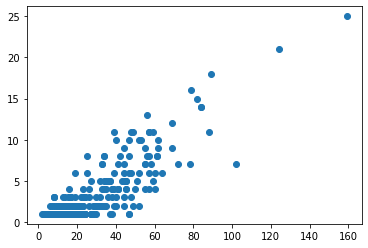

In [24]:
plt.scatter(x=df.shots, y=df.goals)
plt.show()

Cambiamos el estilo del gráfico con seaborn


In [25]:
sns.set()

Aplicamos las diferentes funcionalidades de matplotlib


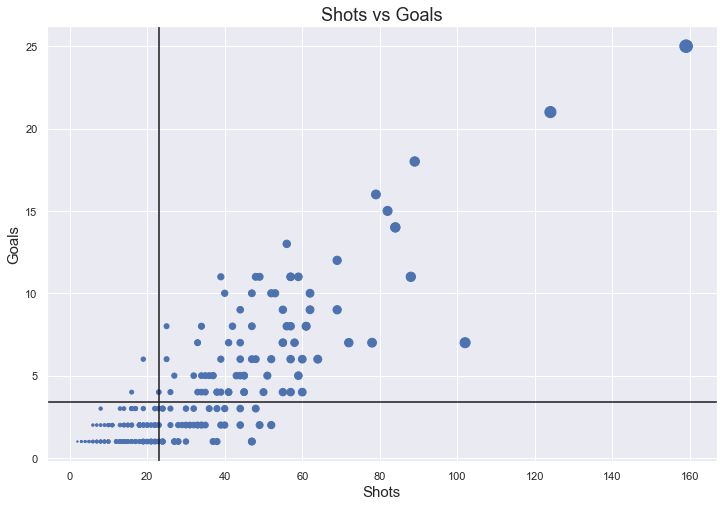

In [26]:
plt.figure(figsize=(12,8))
plt.scatter(x=df.shots, y=df.goals, s=df.shots)
plt.title('Shots vs Goals', fontsize=18)
plt.xlabel('Shots',fontsize=15)
plt.ylabel('Goals',fontsize=15)
plt.axvline(df.shots.mean(), 0, 160, c='k')
plt.axhline(df.goals.mean(), 0, 26, c='k')

plt.show()


Realizamos la visualización con seaborn


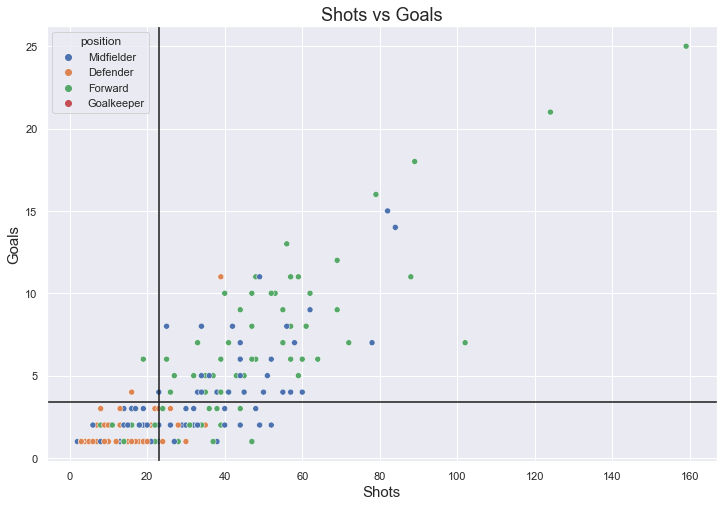

In [27]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df.shots, y=df.goals, hue=df.position)
plt.title('Shots vs Goals', fontsize=18)
plt.xlabel('Shots',fontsize=15)
plt.ylabel('Goals',fontsize=15)
plt.axvline(df.shots.mean(), 0, 160, c='k')
plt.axhline(df.goals.mean(), 0, 26, c='k')
plt.show()

Guardamos los dataset creados para poder importarlos en el segundo notebook, la parte 2 del proyecto.


In [28]:
group_df.to_csv('group_df.csv')
group_df_t.to_csv('group_df_t.csv')